# Inferential Statistics Assignment

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_url = 'https://docs.google.com/spreadsheets/d/1uWH8kic9eW53I7BqNpgDKCz2hWYQSbIrI73q9JR_sag/export?format=csv'

### Read the customer churn data set into a Pandas data frame.

In [3]:
customer = pd.read_csv(data_url)

In [4]:
customer.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,Male,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.50,0
2,2,Male,0,1,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,Male,0,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,Female,0,1,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1


### Generate a histogram that shows the data distribution of the MonthlyCharges field in the data.

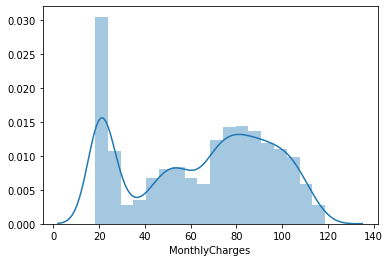

In [6]:
sns.distplot(customer['MonthlyCharges'])
plt.show()

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the MonthlyCharges field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [34]:
sample = customer.sample(1000, replace=True)
sample['MonthlyCharges'].mean()

64.87944999999992

### Bootstrap a sampling distribution for MonthlyCharges field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

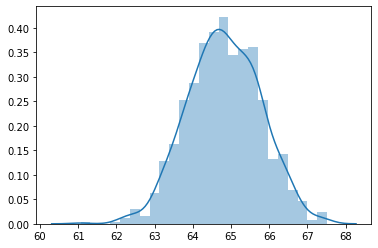

In [37]:
sample_range = 1000
sample_means = []
for _ in range(sample_range):
    sample = customer.sample(1000, replace=True)
    sample_means.append(sample['MonthlyCharges'].mean())
    
sns.distplot(sample_means)
plt.show()

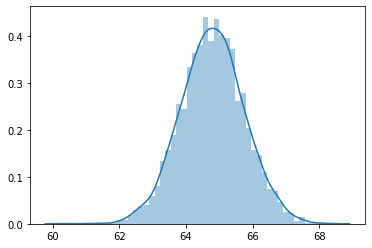

In [38]:
sample_range = 5000
sample_means = []
for _ in range(sample_range):
    sample = customer.sample(sample.shape[0], replace=True)
    sample_means.append(sample['MonthlyCharges'].mean())
    
sns.distplot(sample_means)
plt.show()

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of churn rates that may have resulted in the observed amount of churn we see in the data.

In [39]:
customer.head(2)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,Male,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.50,0


In [52]:
churn = customer["Churn"].sum()
total_cust = customer["CustomerID"].nunique()
obs_rate = churn / total_cust

In [70]:
total_cust

7032

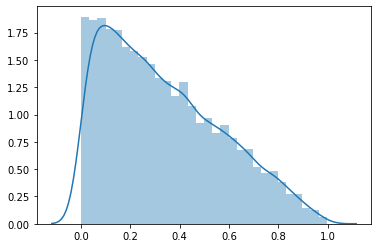

In [62]:
alpha =1
beta = 2
sns.distplot(np.random.beta(alpha, beta, 10000))

In [64]:
customer.dtypes

CustomerID            int64
Gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
InternetService      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

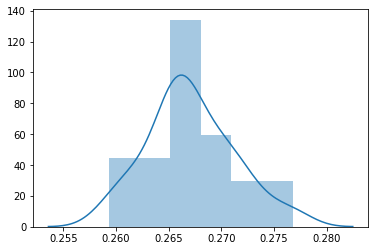

In [73]:
valid_rates = []

for _ in range(100000):
    # Prior
    rate = np.random.beta(alpha, beta)
    # Generative Process
    gen_n_churned = np.random.binomial(total_cust, rate)
    #print(gen_n_churned)
    if gen_n_churned == churn:
        valid_rates.append(rate)
        #print('ev')

        # plot the posterior
sns.distplot(valid_rates)
plt.show()